In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


In [2]:
import numpy as np
import os

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
import sklearn
from sklearn.datasets import load_sample_image

# **Exercise 1**

In [5]:
china = load_sample_image('china.jpg') / 255
flower = load_sample_image('flower.jpg') / 255
images = np.array([china, flower])

In [6]:
batch_size, height, width, channels = images.shape
print("batch size:", batch_size)
print("height * width:", height,  "*", width)
print("channels:", channels)

batch size: 2
height * width: 427 * 640
channels: 3


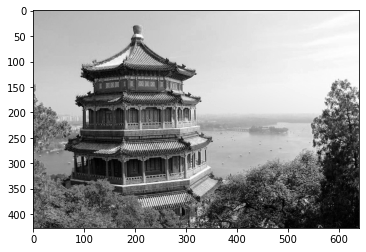

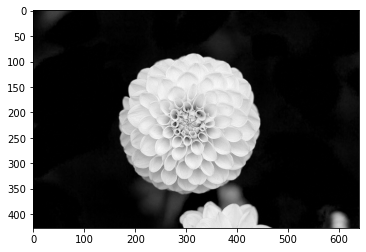

In [7]:
plt.imshow(images[0][:,:,0], cmap = 'gray')
plt.show()
plt.imshow(images[1][:,:,0], cmap = 'gray')
plt.show()

In [8]:
filters = np.zeros(shape = (7, 7, channels, 2), dtype = np.float32)
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1

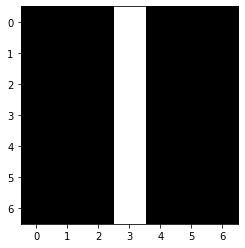

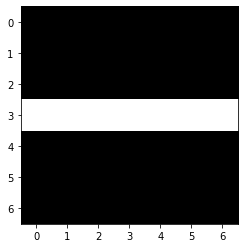

In [9]:
plt.imshow(filters[:, :, 0, 0], cmap = 'gray')
plt.show()
plt.imshow(filters[:, :, 0, 1], cmap = 'gray')
plt.show()

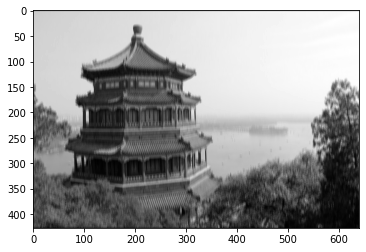

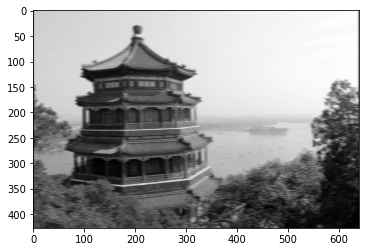

In [10]:
outputs = tf.nn.conv2d(images, filters, strides = 1, padding = 'SAME')
plt.imshow(outputs[0, :, :, 0], cmap = 'gray')
plt.show()
plt.imshow(outputs[0, :, :, 1], cmap = 'gray')
plt.show()

In [11]:
def crop(images):
  return  images[150:220, 130:250]

Input


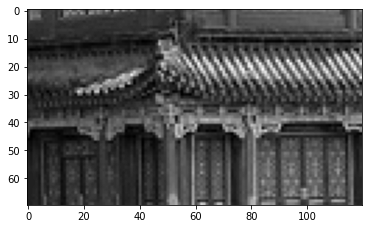

In [12]:
print("Input")
plt.imshow(crop(images[0, :, :, 0]), cmap = 'gray')
plt.show()

china_vertical


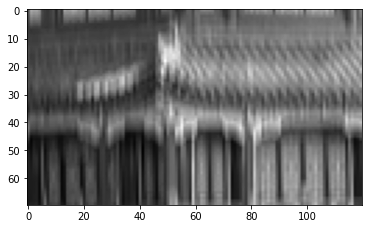

china_horizontal


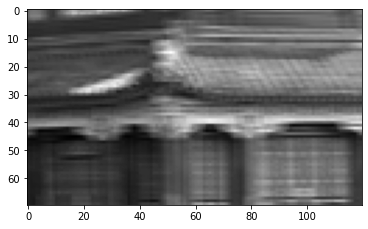

In [13]:
for feature_map_index, filename in enumerate(['china_vertical',  'china_horizontal']):
  print(filename)
  plt.imshow(crop(outputs[0, :, :, feature_map_index]), cmap = 'gray')
  plt.show()

# **Exercise 2:**

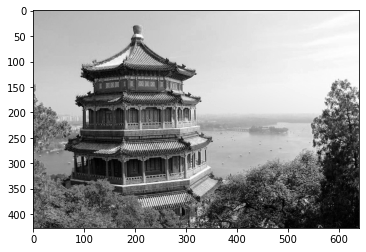

Input's H*W (427, 640)


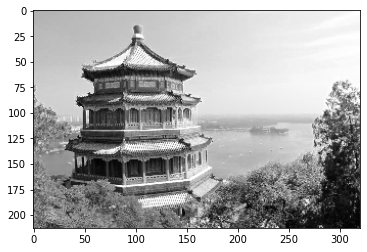

Input's H*W (213, 320)


In [14]:
max_pool = keras.layers.MaxPool2D(pool_size = 2, dtype = 'float64')
outputs = max_pool(images)
plt.imshow(images[0, :, :, 0], cmap = 'gray')
plt.show()
print("Input's H*W", images[0, :, :, 0].shape)
plt.imshow(outputs[0, :, :, 0], cmap = 'gray')
plt.show()
print("Input's H*W", outputs[0, :, :, 0].shape)

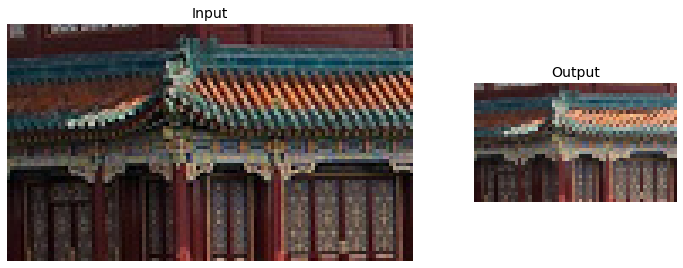

In [15]:
cropped_images = np.array([crop(image) for image in images], dtype = np.float32)
output = max_pool(cropped_images)

fig = plt.figure(figsize = (12, 8))
gs = mpl.gridspec.GridSpec(nrows = 1, ncols = 2, width_ratios = [2, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize = 14)
ax1.imshow(cropped_images[0])
ax1.axis("off")
ax1 = fig.add_subplot(gs[0, 1])
ax1.set_title("Output", fontsize = 14)
ax1.imshow(output[0])
ax1.axis("off")
plt.show()

In [16]:
output = tf.nn.max_pool(images, ksize = (1, 1, 1, 3), strides = (1, 1, 1, 3), padding = "VALID")
print("images shape:", images.shape)
print("output shape:", output.shape)

images shape: (2, 427, 640, 3)
output shape: (2, 427, 640, 1)


In [17]:
depth_pool = keras.layers.Lambda(
    lambda X: tf.nn.max_pool(X, ksize = (1, 1, 1, 3), strides = (1, 1, 1, 3), padding = "VALID"),
    dtype = 'float64'
)
output = depth_pool(images)
print("images shape:", images.shape)
print("output shape:", output.shape)

images shape: (2, 427, 640, 3)
output shape: (2, 427, 640, 1)


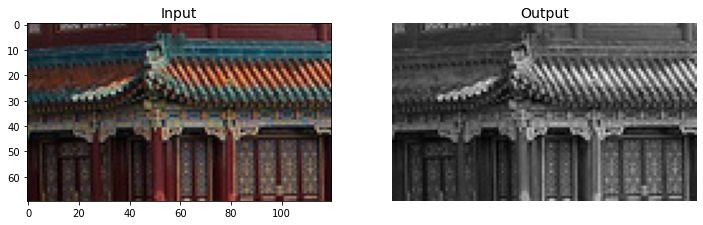

In [18]:
plt.figure(figsize = (12, 8))
plt.subplot(1, 2, 1)
plt.title("Input", fontsize = 14)
plt.imshow(cropped_images[0])
plt.subplot(1, 2, 2)
plt.title("Output", fontsize = 14)
plt.imshow(depth_pool(cropped_images)[0, ..., 0], cmap = 'gray')
plt.axis('off')
plt.show()

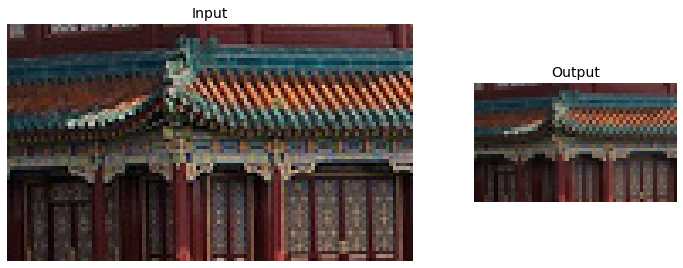

In [19]:
avg_pool = keras.layers.AvgPool2D(pool_size = 2)
output_avg = avg_pool(cropped_images)
fig = plt.figure(figsize = (12, 8))
gs = mpl.gridspec.GridSpec(nrows = 1, ncols = 2, width_ratios = [2, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize = 14)
ax1.imshow(cropped_images[0])
ax1.axis('off')
ax1 = fig.add_subplot(gs[0, 1])
ax1.set_title("Output", fontsize = 14)
ax1.imshow(output_avg[0])
ax1.axis('off')
plt.show()

In [20]:
global_avg_pool = keras.layers.GlobalAveragePooling2D(dtype = 'float64')
output = global_avg_pool(images)
print("images:", images.shape)
print("output:", output.shape)

images: (2, 427, 640, 3)
output: (2, 3)


In [21]:
global_avg_pool = keras.layers.Lambda(
    lambda X: tf.reduce_mean(X, axis = [1, 2]),
    dtype = 'float64'
)
output = global_avg_pool(images)
print("images:", images.shape)
print("output:", output.shape)

images: (2, 427, 640, 3)
output: (2, 3)


# **Exercise 3:**

In [22]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [23]:
model = keras.models.Sequential([
  keras.layers.Conv2D(64, 7, activation = 'relu', padding = 'same', input_shape = [28, 28, 1]),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same'),
  keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same'),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same'),
  keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same'),
  keras.layers.MaxPooling2D(2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation = 'relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(64, activation = 'relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(10, activation = 'softmax')
])

In [24]:
(X_train_full, Y_train_full), (X_test, Y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
Y_train, Y_valid = Y_train_full[:-5000], Y_train_full[-5000:]

X_mean = X_train.mean(axis = 0, keepdims = True)
X_std = X_train.std(axis = 0, keepdims = True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

4423680/4422102 [==============================] - 0s 0us/step


In [25]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'nadam', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 10, validation_data = (X_valid, Y_valid))
score = model.evaluate(X_test, Y_test)
X_new = X_test[:10]
Y_pred = model.predict(X_new)

Epoch 1/10
1719/1719 [==============================] - 754s 438ms/step - loss: 0.9916 - accuracy: 0.6483 - val_loss: 0.3489 - val_accuracy: 0.8710
Epoch 2/10
1719/1719 [==============================] - 748s 435ms/step - loss: 0.4258 - accuracy: 0.8581 - val_loss: 0.3203 - val_accuracy: 0.8840
Epoch 3/10
1719/1719 [==============================] - 749s 436ms/step - loss: 0.3557 - accuracy: 0.8807 - val_loss: 0.2979 - val_accuracy: 0.8938
Epoch 4/10
1719/1719 [==============================] - 748s 435ms/step - loss: 0.3146 - accuracy: 0.8941 - val_loss: 0.3010 - val_accuracy: 0.8926
Epoch 5/10
1719/1719 [==============================] - 751s 437ms/step - loss: 0.3045 - accuracy: 0.8956 - val_loss: 0.2839 - val_accuracy: 0.8976
Epoch 6/10
1719/1719 [==============================] - 749s 436ms/step - loss: 0.2769 - accuracy: 0.9065 - val_loss: 0.2677 - val_accuracy: 0.9056
Epoch 7/10
1719/1719 [==============================] - 756s 440ms/step - loss: 0.2703 - accuracy: 0.9081 - val_

# **Exercise 4:**

In [32]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self._Layers = []
    self._Layers.append(keras.layers.Conv2D(64, 7, activation = 'relu', padding = 'same', input_shape = [28, 28, 1]))
    self._Layers.append(keras.layers.MaxPooling2D(2))
    self._Layers.append(keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same'))
    self._Layers.append(keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same'))
    self._Layers.append(keras.layers.MaxPooling2D(2))
    self._Layers.append(keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same'))
    self._Layers.append(keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same'))
    self._Layers.append(keras.layers.MaxPooling2D(2))
    self._Layers.append(keras.layers.Flatten())
    self._Layers.append(keras.layers.Dense(128, activation = 'relu'))
    self._Layers.append(keras.layers.Dropout(0.5))
    self._Layers.append(keras.layers.Dense(64, activation = 'relu'))
    self._Layers.append(keras.layers.Dropout(0.5))
    self._Layers.append(keras.layers.Dense(10, activation = 'softmax'))

  def call(self, inputs):
    net = self._Layers[0](inputs)
    for i in range(1, len(self.layers)):
      net = self._Layers[i](net)
    return net

In [33]:
model = MyModel()
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'nadam', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 10, validation_data = (X_valid, Y_valid))
score = model.evaluate(X_test, Y_test)
X_new = X_test[:10]
Y_pred = model.predict(X_new)

Epoch 1/10
1719/1719 [==============================] - 751s 436ms/step - loss: 1.0213 - accuracy: 0.6414 - val_loss: 0.3790 - val_accuracy: 0.8660
Epoch 2/10
1719/1719 [==============================] - 750s 437ms/step - loss: 0.4321 - accuracy: 0.8556 - val_loss: 0.3211 - val_accuracy: 0.8840
Epoch 3/10
1719/1719 [==============================] - 754s 439ms/step - loss: 0.3587 - accuracy: 0.8815 - val_loss: 0.3125 - val_accuracy: 0.8878
Epoch 4/10
1719/1719 [==============================] - 758s 441ms/step - loss: 0.3203 - accuracy: 0.8893 - val_loss: 0.3034 - val_accuracy: 0.8906
Epoch 5/10
1719/1719 [==============================] - 756s 440ms/step - loss: 0.2943 - accuracy: 0.8987 - val_loss: 0.3055 - val_accuracy: 0.8968
Epoch 6/10
1719/1719 [==============================] - 750s 437ms/step - loss: 0.2844 - accuracy: 0.9024 - val_loss: 0.2677 - val_accuracy: 0.9004
Epoch 7/10
1719/1719 [==============================] - 749s 436ms/step - loss: 0.2710 - accuracy: 0.9050 - val_